# Examples of Tree Calculations Made Using unsampled

In [1]:
from unsampled import *
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib as mpl

### Import Trees

In [2]:
#imports trees as DendroPy trees

#toy tree with some simultaneous sampling
toy_2 = Tree.get(path="toytree2.nex", schema="nexus")

#Conakry subtree 
conakry = Tree.get(path="ebola.tree", schema="nexus")

#Full Ebola MCC tree generated from constant population, empty alignment
ebov = Tree.get(path="full-ebola.nex", schema="nexus")


### Functions available from unsampled:
    - prod: finds the product of a list of numbers or if the list is empty returns 1
    - name_nodes: names nodes sequentially (1, 2, 3, ...) or if it's a leaf, leaves the existing name
    - name_edges: names edges sequentially 
#### Tree Intervals:
    -zipped_sorted_intervals: for an entire tree, divides the tree into intervals and gives [beginning of interval (dist from root), end of interval], [all active lineages within that interval]
    -zipped_partial_intervals: same as above but can take in a distance from the root to begin the first interval (will only evaluate part of the tree)
    - conditioned_prob_lineage_coal: conditional probability of coalescing to one lineage in a specific interval, dependent on the tree structure
    - pcoal_along_edge: dictionary where each edge is a key with the value corresponding to the conditioned probability of coalescing to that edge

#### Full tree measures:   
    - calcualte_cumulative_node_prob: expected proportion of tips expected under each clade
    - node_zscores: z-scores for each internal node (difference between expected proportion and observed in the tree)
    
#### For Validation:
    - randomly prune tree: prunes specified proportion of tree and keeps relevant information
    - theoretical_attachment_prob_matrix: for each dropped sample's location, gives the probability of attaching to each edge in the available, pruned tree
    - observed_attachment_prob_matrix: given a tree, pruned tree, and dropped samples, find where the dropped samples attached to the pruned tree
    - binary_expectations: for the theoretical attachment probability matrix record only the edge with the highest probability (classification)
    
#### For Plotting:
    - y_dist_dict: assigns each node a y-position to use for plotting
    

### Examples

In [ ]:
#total distance from root to furthest tip
toy_2.max_distance_from_root()

In [4]:
name_nodes(toy_2)
name_edges(toy_2)
y_positions = y_dist_dict(toy_2)

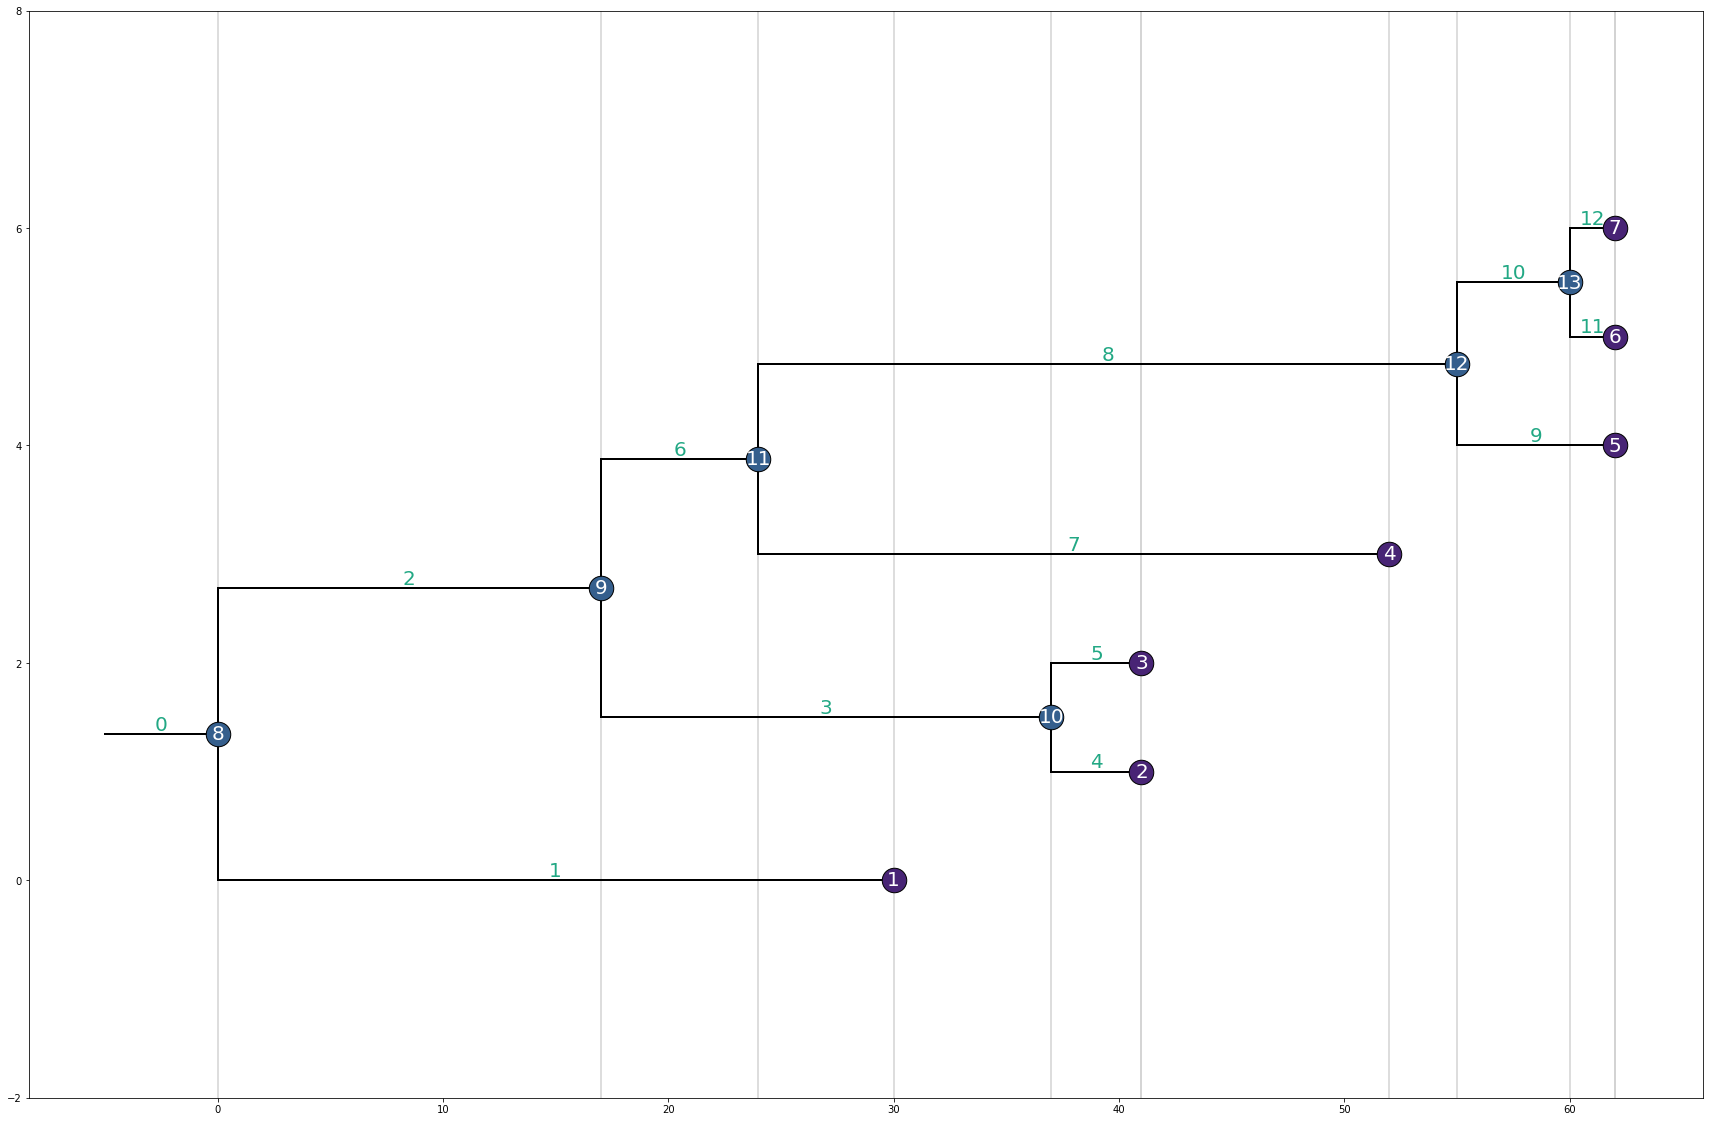

In [38]:
#plotted toy tree with labeled nodes and edges
cmap = mpl.cm.get_cmap('viridis')
fig,ax = plt.subplots(figsize=(30,20),facecolor='w')
for k in toy_2.nodes(): ## iterate over objects in tree
    
    # positioning
    y=y_positions.get(k) 
    yp = y_positions.get(k.parent_node)
    if k.edge.rootedge:
        x=0.0
    else:
        x=k.distance_from_root()
    if k.parent_node==None:
        xp=x-5
    else:
        xp=k.parent_node.distance_from_root()
        

    if k.is_leaf(): # if leaf...
        ax.scatter(x,y,s=600,facecolor=cmap(.1),edgecolor='k',zorder=11) # plot circle for every tip
    else:
        ax.scatter(x,y,s=600,facecolor=cmap(.3),edgecolor='k',zorder=11) # plot circle for every tip
    ax.plot([xp,xp],[y, yp],lw=2, color='k',ls='-',zorder=9) #vertical bar plotting
    ax.plot([xp,x], [y,y], lw=2, color='k', ls='-', zorder=9) #branch plotting
    plt.axvline(x, c = "lightgrey")
    #labeling
    ax.text(x, y, k.label, va = 'center', ha= 'center', size=20, color = 'w', zorder = 16)
    ax.text(x -.5*(x-xp), y, k.edge.label, va = 'bottom', ha= 'center', size=20, color = cmap(.6), zorder = 18)
       
ax.set_ylim(-2, len(toy_2.leaf_nodes()) + 1)

plt.show()

In [5]:
#for the full tree the conditional probability of coalescing to one lineage within that interval
interval_pcoal = conditioned_prob_lineage_coal(toy_2, 50)
interval_pcoal

[0.03769318776094751,
 0.08038569982173331,
 0.04228762786133505,
 0.12171487735317825,
 0.030153158172423835,
 0.03656098353851305,
 0.020026840080584703,
 0.014864586637034894,
 0.02107607653267766]

In [ ]:
#population size = 50
full_pcoal = pcoal_along_edge(toy_2, 50) #full tree
full_pcoal

In [ ]:
pcoal_along_edge(toy_2, 50, 70) #a slice further than the most recent sampled tip, gives the same probs as t

In [46]:
partial_pcoal = pcoal_along_edge(toy_2, 50, 39) #sliced partway through the tree
partial_pcoal

{<dendropy.datamodel.treemodel.Edge at 0x9895ba8>: 0.11532512103806236,
 <dendropy.datamodel.treemodel.Edge at 0x9895c18>: 0.1491229633804595,
 <dendropy.datamodel.treemodel.Edge at 0x9895c88>: 0.05615628367287511,
 <dendropy.datamodel.treemodel.Edge at 0x9895cf8>: 0.19038182050785418,
 <dendropy.datamodel.treemodel.Edge at 0x9895d68>: 0.03696405275844716,
 <dendropy.datamodel.treemodel.Edge at 0x9895dd8>: 0.03696405275844716,
 <dendropy.datamodel.treemodel.Edge at 0x9895e48>: 0.03960604064874824,
 <dendropy.datamodel.treemodel.Edge at 0x9895eb8>: 0.18773983261755312,
 <dendropy.datamodel.treemodel.Edge at 0x9895f28>: 0.18773983261755312,
 <dendropy.datamodel.treemodel.Edge at 0x9895f98>: 0.0,
 <dendropy.datamodel.treemodel.Edge at 0x98a9048>: 0.0,
 <dendropy.datamodel.treemodel.Edge at 0x98a90b8>: 0.0,
 <dendropy.datamodel.treemodel.Edge at 0x98a9128>: 0.0}

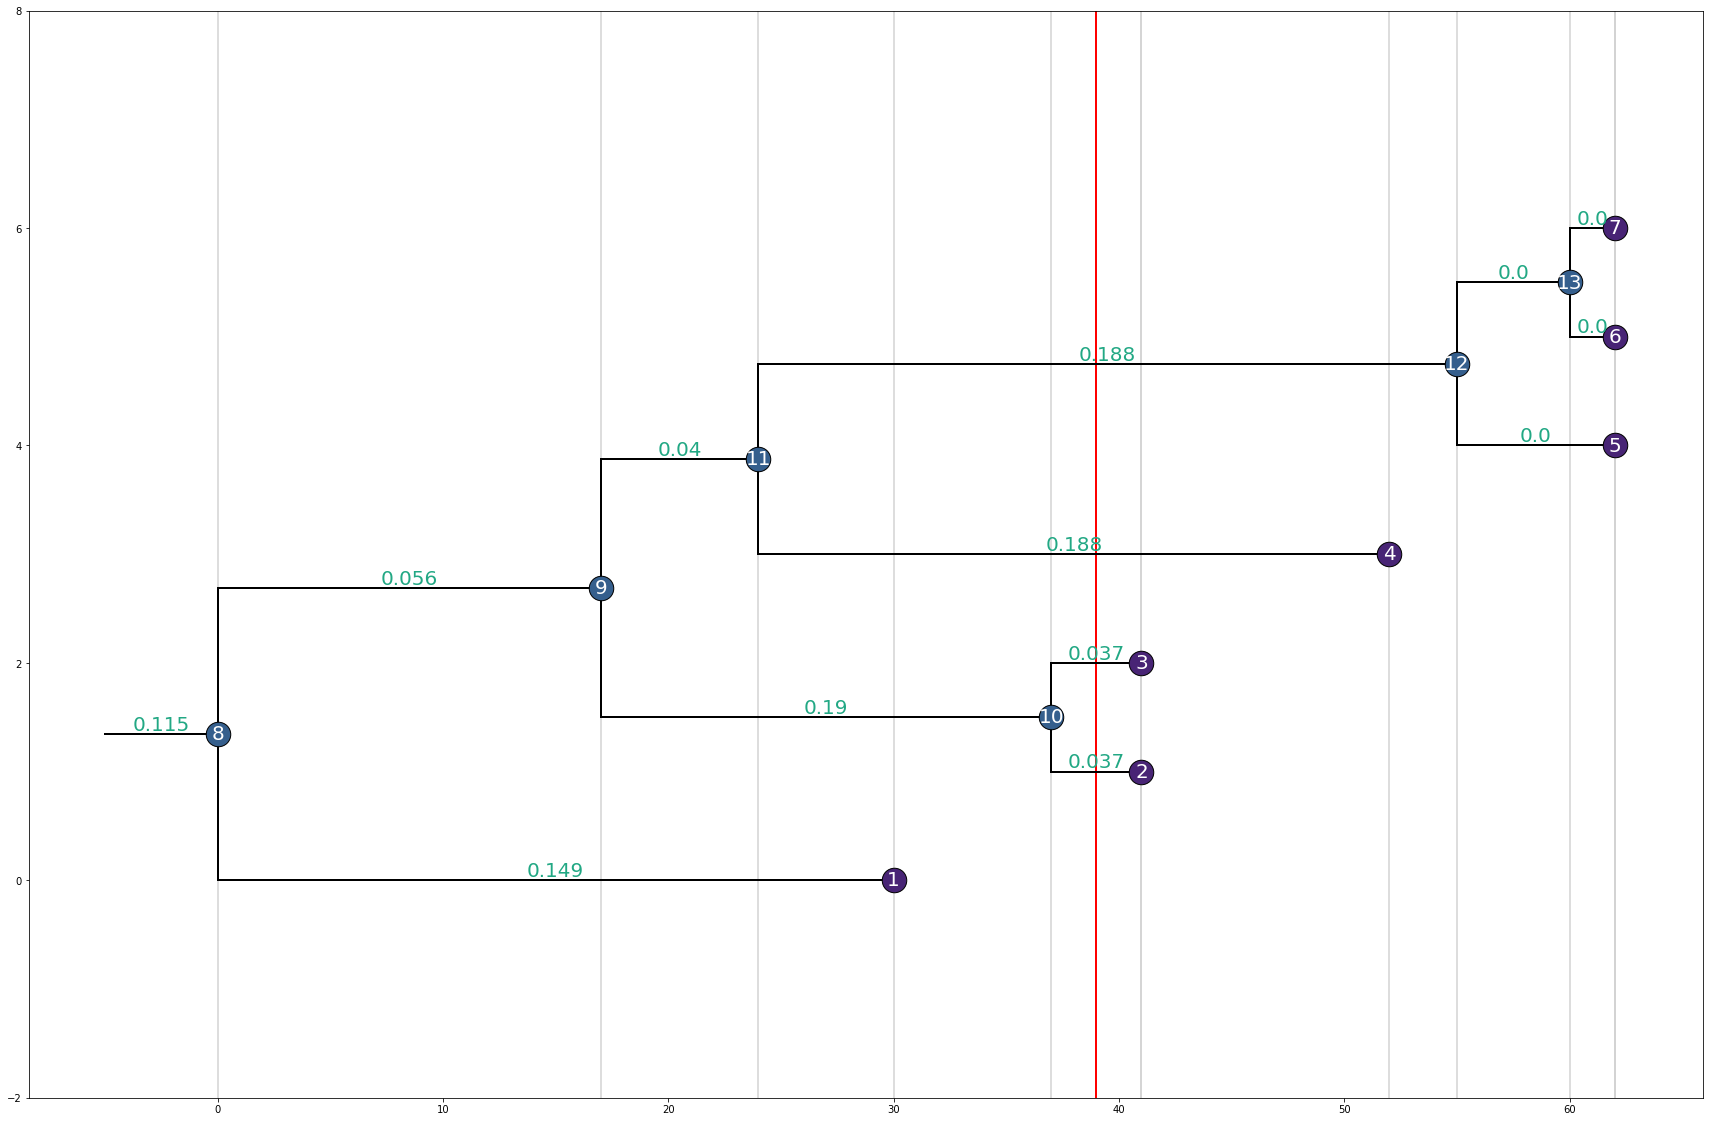

In [48]:
#plotted toy tree with labeled nodes and edges
cmap = mpl.cm.get_cmap('viridis')
fig,ax = plt.subplots(figsize=(30,20),facecolor='w')
for k in toy_2.nodes(): ## iterate over objects in tree
    
    # positioning
    y=y_positions.get(k) 
    yp = y_positions.get(k.parent_node)
    if k.edge.rootedge:
        x=0.0
    else:
        x=k.distance_from_root()
    if k.parent_node==None:
        xp=x-5
    else:
        xp=k.parent_node.distance_from_root()
        
    
    if k.is_leaf(): # if leaf...
        ax.scatter(x,y,s=600,facecolor=cmap(.1),edgecolor='k',zorder=11) # plot circle for every tip
    else:
        ax.scatter(x,y,s=600,facecolor=cmap(.3),edgecolor='k',zorder=11) # plot circle for every tip
    ax.plot([xp,xp],[y, yp],lw=2, color='k',ls='-',zorder=9) #vertical bar plotting
    ax.plot([xp,x], [y,y], lw=2, color='k', ls='-', zorder=9) #branch plotting
    plt.axvline(x, c = "lightgrey")
    #labeling
    ax.text(x, y, k.label, va = 'center', ha= 'center', size=20, color = 'w', zorder = 16)
    ax.text(x -.5*(x-xp), y, round(partial_pcoal.get(k.edge), 3), va = 'bottom', ha= 'center', size=20, color = cmap(.6), zorder = 18)
    plt.axvline(39, c = "red")
    
       
ax.set_ylim(-2, len(toy_2.leaf_nodes()) + 1)

plt.show()

In [45]:
node_probs = calculate_cumulative_node_prob(toy_2, 50)
node_probs

{<Node object at 0x9895b70L: '8' (None)>: 0.956717202098034,
 <Node object at 0x9895c50L: '9' (None)>: 0.8796736223150591,
 <Node object at 0x9895cc0L: '10' (None)>: 0.06030631634484767,
 <Node object at 0x9895e10L: '11' (None)>: 0.7330503090770439,
 <Node object at 0x9895ef0L: '12' (None)>: 0.27385096292630917,
 <Node object at 0x9895fd0L: '13' (None)>: 0.07538637552189502}

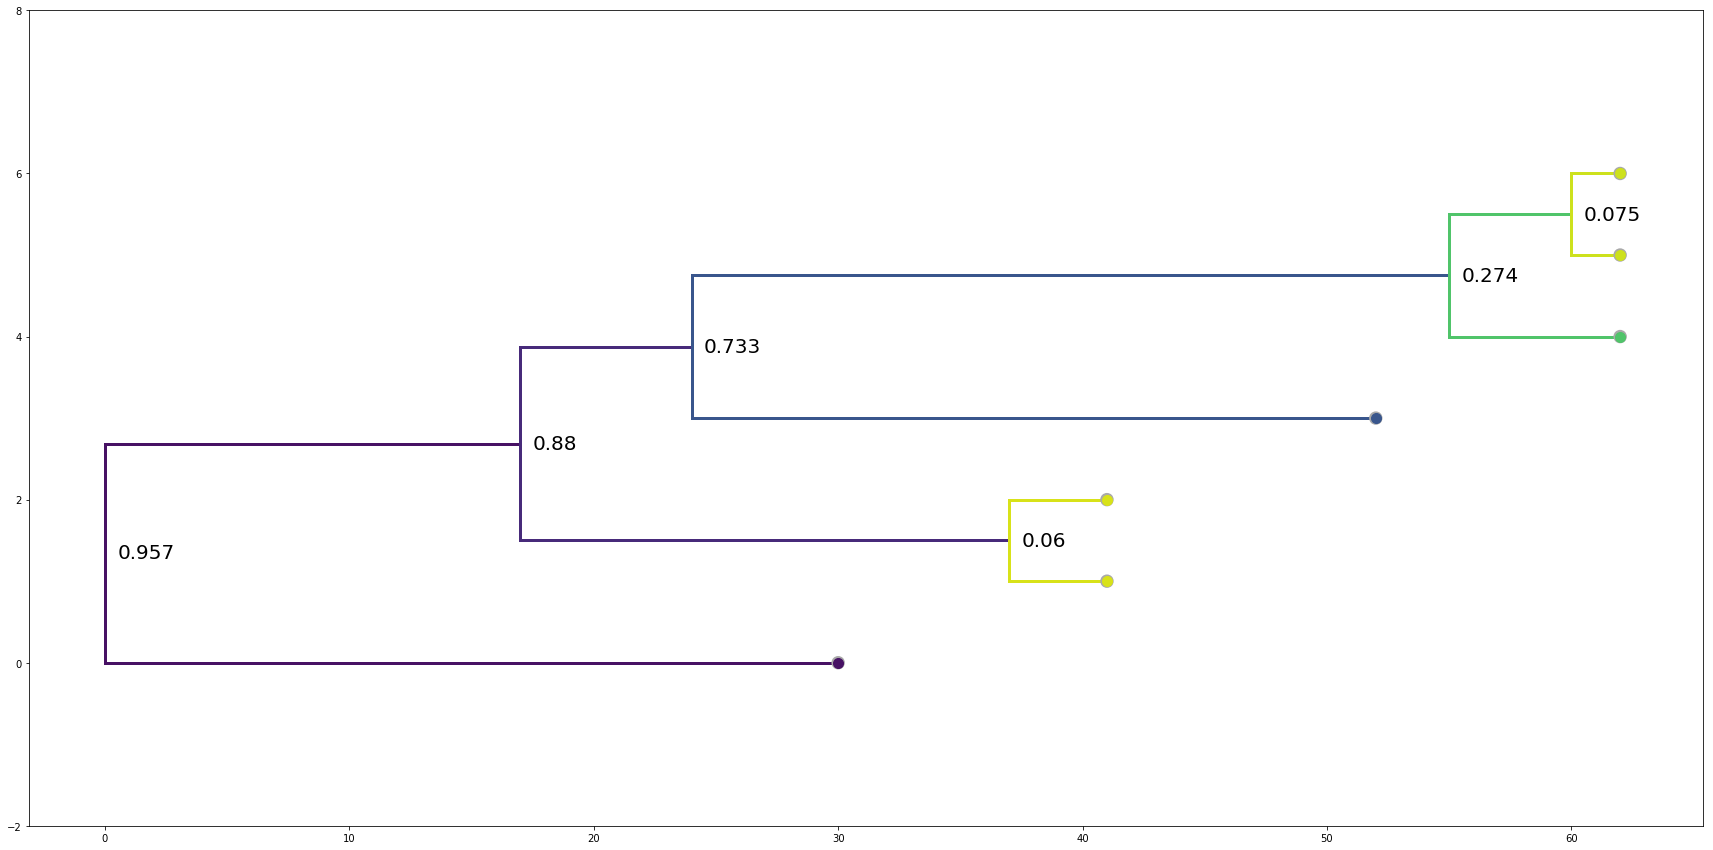

In [58]:
fig,ax = plt.subplots(figsize=(30,15),facecolor='w')
branchWidth=3
cmap=mpl.cm.viridis

for k in toy_2.nodes(): ## iterate over objects in tree
    
    # positioning
    y=y_positions.get(k) 
    if k.edge.rootedge:
        x=0.0
    else:
        x=k.distance_from_root()
  
    if node_probs.get(k) != None:
        c = cmap(1-(node_probs.get(k)))
        txt = round(node_probs.get(k), 3)
    else:
        c = cmap(1-(node_probs.get(k.parent_node)))
        txt = ""

    if k.is_leaf(): # if leaf...
        ax.scatter(x,y,s=100,facecolor=c,edgecolor=c,zorder=11) # plot circle for every tip
        ax.scatter(x,y,s=100+0.8*100,facecolor='darkgrey',edgecolor='none',zorder=10) # plot black circle underneath
        
    else:
        yc1 = y_positions.get(k.child_nodes()[0])
        yc2 = y_positions.get(k.child_nodes()[-1])
        xc1 = k.child_nodes()[0].distance_from_root()
        xc2 = k.child_nodes()[-1].distance_from_root()
    
        ax.plot([x,x],[yc1, yc2],lw=branchWidth, color=c,ls='-',zorder=9) #vertical bar plotting
        ax.plot([xc1,x], [yc1,yc1], lw=branchWidth, color=c, ls='-', zorder=9) #plot top child edge
        ax.plot([xc2,x], [yc2,yc2], lw=branchWidth, color=c, ls='-', zorder=9) #plot bottom child edge
    
    #labeling
    ax.text(x + .5, y, txt, va = 'center', ha= 'left', size=20, color = 'k')

ax.set_ylim(-2, len(toy_2.leaf_nodes()) + 1)
plt.show()

In [50]:
zs = node_zscores(node_probs, toy_2)
zs

{<Node object at 0x9895b70L: '8' (None)>: 0.20978051018862076,
 <Node object at 0x9895c50L: '9' (None)>: 0.64602507923402419,
 <Node object at 0x9895cc0L: '10' (None)>: -0.99743443499845375,
 <Node object at 0x9895e10L: '11' (None)>: 1.5679882508319025,
 <Node object at 0x9895ef0L: '12' (None)>: -0.52888299729010024,
 <Node object at 0x9895fd0L: '13' (None)>: -0.89747640796599315}

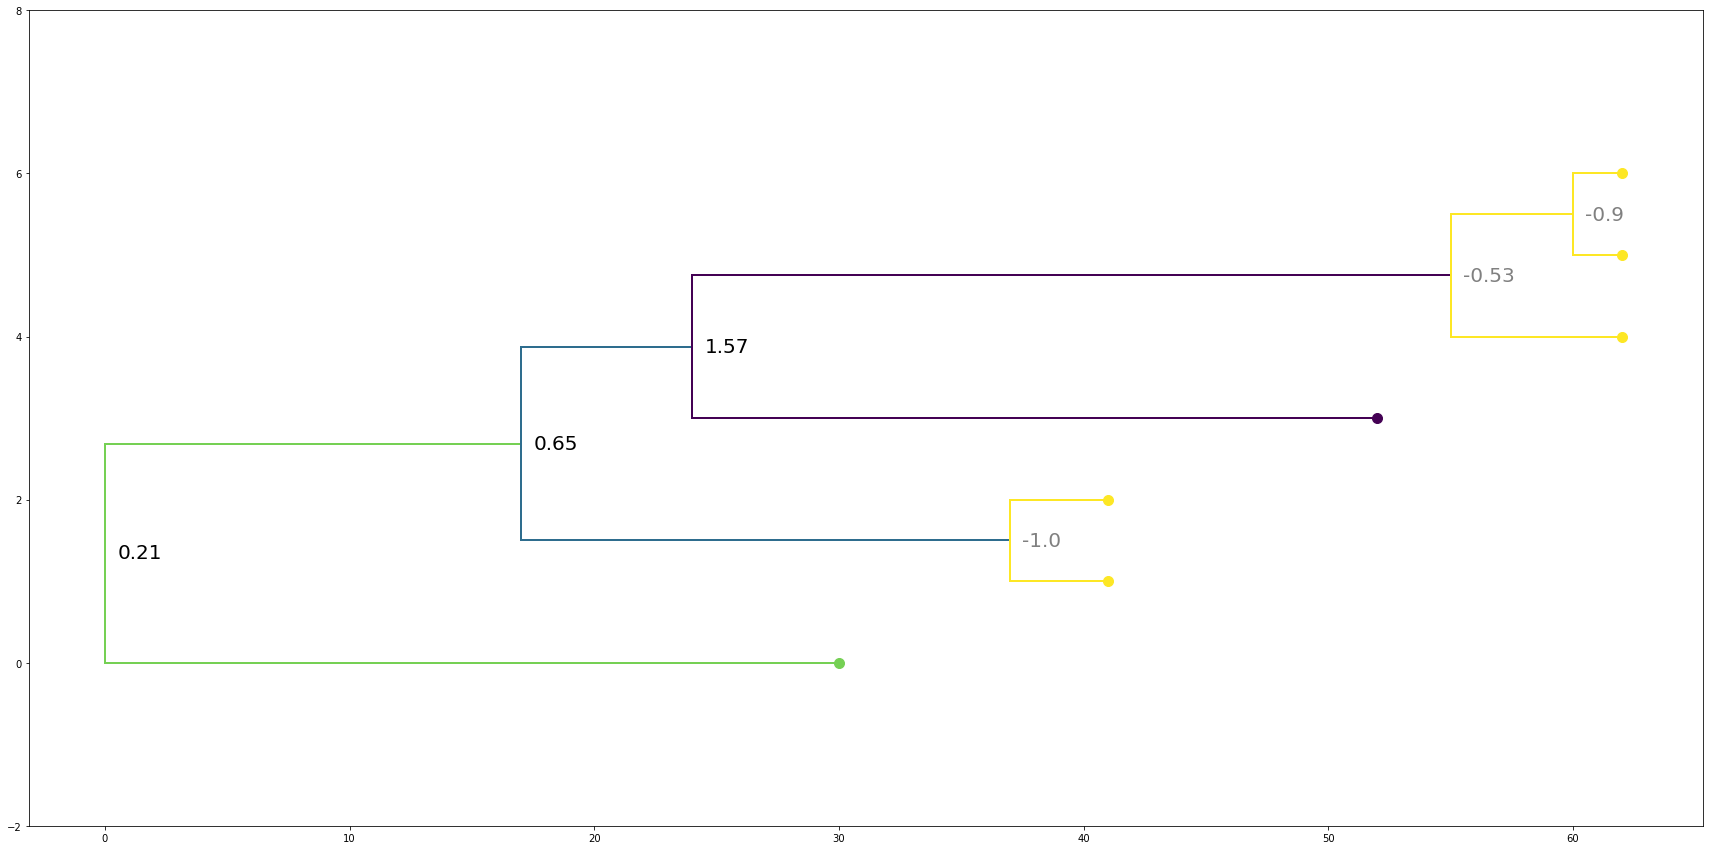

In [57]:
fig,ax = plt.subplots(figsize=(30,15),facecolor='w')
branchWidth=2
cmap=mpl.cm.viridis

for k in toy_2.nodes(): ## iterate over objects in tree
    
    # positioning
    y=y_positions.get(k) 
    if k.edge.rootedge:
        x=0.0
    else:
        x=k.distance_from_root()

    # dropped tips, color, lty, size
    if node_probs.get(k) != None:
        c = cmap(1-(zs.get(k)))
        txt = round(zs.get(k), 2)
        if zs.get(k) > 0:
            col = "k"
        else:
            col = "grey"
    else:
        c = cmap(1-(zs.get(k.parent_node)))
        txt = ""

    lty = "-"
    s = 100
    
    if k.is_leaf(): # if leaf...
        ax.scatter(x,y,s=s,facecolor=c,edgecolor=c,zorder=11) # plot circle for every tip
        
    else:
        yc1 = y_positions.get(k.child_nodes()[0])
        yc2 = y_positions.get(k.child_nodes()[-1])
        xc1 = k.child_nodes()[0].distance_from_root()
        xc2 = k.child_nodes()[-1].distance_from_root()
    
        ax.plot([x,x],[yc1, yc2],lw=branchWidth, color=c,ls=lty,zorder=9) #vertical bar plotting
        ax.plot([xc1,x], [yc1,yc1], lw=branchWidth, color=c, ls=lty, zorder=9) #plot top child edge
        ax.plot([xc2,x], [yc2,yc2], lw=branchWidth, color=c, ls=lty, zorder=9) #plot bottom child edge
    
    #labeling
    ax.text(x + .5, y, txt, va = 'center', ha= 'left', size=20, color = col)

ax.set_ylim(-2, len(toy_2.leaf_nodes()) + 1)
plt.show()